In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/Users/hungthai/Desktop/Sales_data/'

In [3]:
os.listdir(path)

['.DS_Store',
 'Untitled-1.ipynb',
 'final_2019.csv',
 'sales2019_3.csv',
 'sales2019_2.csv',
 'sales2019_1.csv',
 'sales2019_5.csv',
 'sales2019_4.csv',
 'sales2019_12.csv',
 'sales2019_10.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_11.csv',
 'sales2019_9.csv',
 'sales2019_8.csv',
 '.ipynb_checkpoints']

## Task 2.1: Merge 12-month data

In [4]:
sale_total = []
length = []
for file in os.listdir(path):
    if file.startswith('sales2019'):
        file_path = path + file
        df_sale = pd.read_csv(file_path)
        sale_total.append(df_sale)
        length.append(len(df_sale))
result = pd.concat(sale_total)
df = result
df.to_csv("final_2019.csv", index = False)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


## Task 2.2: Extract month

In [5]:
df['month'] = df['Order Date'].str[:2]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03
...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",08
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",08
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",08
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",08


## Task 2.3: Get rid of nan and or

In [6]:
df = df.dropna (how='all')

In [7]:
df = df[df['month'] != 'Or']

## Task 3: Reporting

### Task 3.1: what was the best month for sales?

In [8]:
df['sales'] = ''
df['sales'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99
...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",08,99.99
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",08,8.97
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",08,3.84
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",08,11.95


In [9]:
moving_cell = df.pop('sales')
df.insert(4, 'sales', moving_cell)

In [10]:
best_sale_month = df.groupby('month')['sales'].sum().reset_index()
best_sale_month

,month,sales
0,01,1822256.73
1,02,2202022.42
2,03,2807100.38
3,04,3390670.24
4,05,3152606.75
5,06,2577802.26
6,07,2647775.76
7,08,2244467.88
8,09,2097560.13
9,10,3736726.88


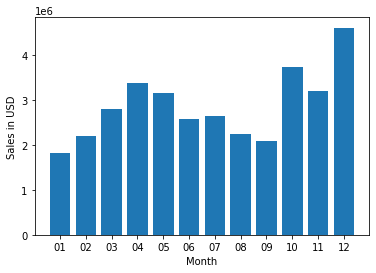

In [11]:
sale_amount = best_sale_month.sales
sale_month = best_sale_month.month
plt.bar(x = sale_month, height = sale_amount)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

### Task 3.2: What city has the best sales?

In [12]:
df['city'] = ''
get_address = lambda address: address.split(',')[1]
df['city'] = df['Purchase Address'].apply(get_address)
df.head()


,Order ID,Product,Quantity Ordered,Price Each,sales,Order Date,Purchase Address,month,city
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [13]:
best_sale_city = df.groupby('city')['sales'].sum().reset_index()
best_sale_city

,city,sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


In [14]:
best_sale_city.max()

city        Seattle
sales    8262203.91
dtype: object

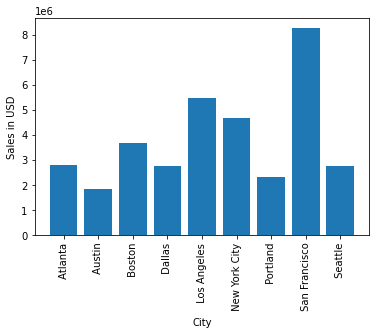

In [15]:
city_sale_amount = best_sale_city.sales
city = best_sale_city.city
plt.bar(x = city, height = city_sale_amount)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.xticks(rotation=90)
plt.show()

### Task 3.3: what time should we display ads to maximize the likelihood of customer's buying product?

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sales,Order Date,Purchase Address,month,city
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [17]:
df['Order Time'] = df['Order Date'].str[-5:-3]
df

,Order ID,Product,Quantity Ordered,Price Each,sales,Order Date,Purchase Address,month,city,Order Time
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco,05
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco,00
...,...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",08,San Francisco,22
12007,248147,AAA Batteries (4-pack),3,2.99,8.97,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",08,Boston,16
12008,248148,AA Batteries (4-pack),1,3.84,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101",08,Seattle,07
12009,248149,USB-C Charging Cable,1,11.95,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",08,San Francisco,12


In [18]:
best_time_buy = df.groupby('Order Time')['Order ID'].count().reset_index()
best_time_buy.columns = ['Order Time', 'Times']

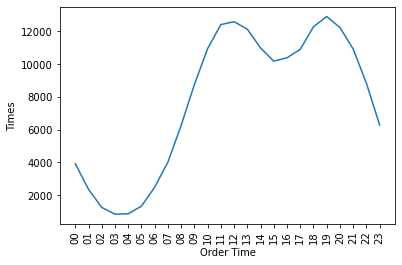

In [19]:
order_time = best_time_buy['Order Time']
times = best_time_buy['Times']
plt.plot(order_time, times)
plt.xlabel('Order Time')
plt.ylabel('Times')
plt.xticks(rotation=90)
plt.show()

### Task 3.4: What products are most often sold together?

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sales,Order Date,Purchase Address,month,city,Order Time
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco,05
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco,00


In [24]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup

,Order ID,Product,Quantity Ordered,Price Each,sales,Order Date,Purchase Address,month,city,Order Time
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
30,162037,iPhone,1,700,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,02
31,162037,Lightning Charging Cable,1,14.95,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,02
...,...,...,...,...,...,...,...,...,...,...
11946,248088,Bose SoundSport Headphones,1,99.99,99.99,08/13/19 19:26,"614 11th St, San Francisco, CA 94016",08,San Francisco,19
11963,248105,Google Phone,1,600,600.00,08/28/19 19:27,"21 Center St, New York City, NY 10001",08,New York City,19
11964,248105,Wired Headphones,1,11.99,11.99,08/28/19 19:27,"21 Center St, New York City, NY 10001",08,New York City,19
11979,248120,Google Phone,1,600,600.00,08/02/19 20:42,"619 5th St, New York City, NY 10001",08,New York City,20


In [36]:
df_product_together = df_dup.groupby(['Order ID'])['Product'].apply(lambda product: ', '.join(product)).reset_index()
df_product_together

,Order ID,Product
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop, Wired Headphones"
7132,319556,"Google Phone, Wired Headphones"
7133,319584,"iPhone, Wired Headphones"
7134,319596,"iPhone, Lightning Charging Cable"


In [38]:
df_product_together['Product'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: Product, dtype: int64

### Task 3.5: What product sold the most? Why do you think it sold the most?

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,sales,Order Date,Purchase Address,month,city,Order Time
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco,05
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco,00


In [56]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12010
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   sales             185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   month             185950 non-null  object 
 8   city              185950 non-null  object 
 9   Order Time        185950 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 15.6+ MB


In [60]:
df_sold_most = df.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean'}).sort_values(by = 'Quantity Ordered',ascending = False).head(10).reset_index()
df_sold_most

,Product,Quantity Ordered,Price Each
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


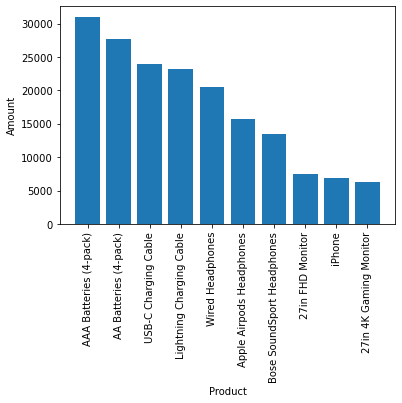

In [61]:
product = df_sold_most['Product']
amount = df_sold_most['Quantity Ordered']
plt.bar(x = product, height = amount)
plt.xlabel('Product')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

/var/folders/gc/753jqhq52ql467y0flqzn67w0000gn/T/ipykernel_39672/4081854252.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=90, size = 9)


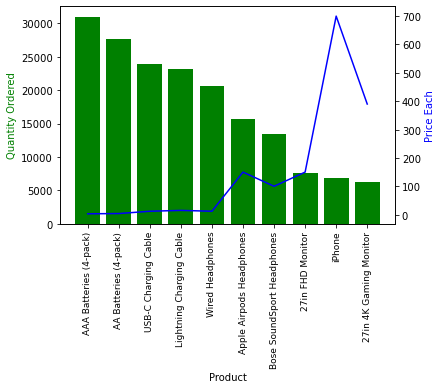

In [71]:
x = df_sold_most['Product']
y1 = df_sold_most['Quantity Ordered']
y2 = df_sold_most['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size = 9)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()